# Introduction to Frequency Modelling 

In [186]:
import seaborn as sns
import pandas as pd
import lightgbm as lgbm
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ConfusionMatrix
df=pd.read_csv('data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   BIRTH       10302 non-null  object 
 3   AGE         10295 non-null  float64
 4   HOMEKIDS    10302 non-null  int64  
 5   YOJ         9754 non-null   float64
 6   INCOME      9732 non-null   object 
 7   PARENT1     10302 non-null  object 
 8   HOME_VAL    9727 non-null   object 
 9   MSTATUS     10302 non-null  object 
 10  GENDER      10302 non-null  object 
 11  EDUCATION   10302 non-null  object 
 12  OCCUPATION  9637 non-null   object 
 13  TRAVTIME    10302 non-null  int64  
 14  CAR_USE     10302 non-null  object 
 15  BLUEBOOK    10302 non-null  object 
 16  TIF         10302 non-null  int64  
 17  CAR_TYPE    10302 non-null  object 
 18  RED_CAR     10302 non-null  object 
 19  OLDCLAIM    10302 non-nul

In [6]:
df['CLAIM_FLAG'].value_counts()

0    7556
1    2746
Name: CLAIM_FLAG, dtype: int64

# Reduce Cols for analysis

<AxesSubplot:xlabel='YOJ'>

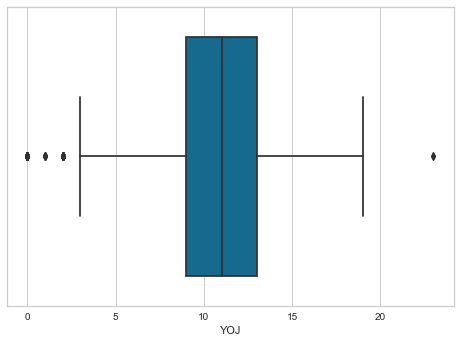

In [182]:
cols = ['ID', 'AGE', 'YOJ', 'INCOME',
        'HOME_VAL', 'MSTATUS', 'GENDER', 
        'EDUCATION', 'OCCUPATION',
        'TRAVTIME', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR',
        'REVOKED',  'CAR_AGE',
        'CLAIM_FLAG', 'URBANICITY']

sns.boxplot(data=df, x='YOJ')

In [169]:
X = df[cols]
X=X.replace('[^A-Z0-9]','', regex=True)

In [171]:
X[['INCOME','HOME_VAL','BLUEBOOK']] = X[['INCOME','HOME_VAL','BLUEBOOK']].fillna(-999).astype('int')
O = pd.get_dummies(X[['ID','MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'CAR_TYPE', 'RED_CAR','REVOKED', 'URBANICITY']])
X = X.select_dtypes(['int','float'])
X = X.merge(O, on='ID',how='left')
X=X.set_index('ID')
y=X['CLAIM_FLAG']

In [184]:
X_train,X_test,y_train,y_test = train_test_split(X.drop(columns='CLAIM_FLAG'), y, test_size=.7, stratify= y)

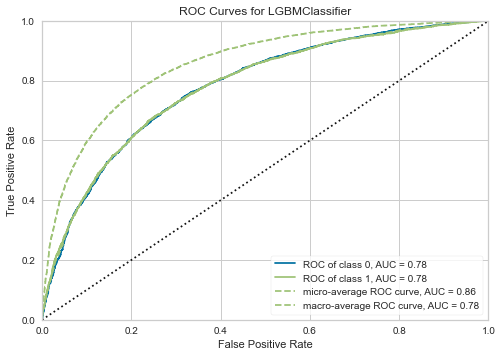

<AxesSubplot:title={'center':'ROC Curves for LGBMClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [185]:
vis = ROCAUC(lgbm.LGBMClassifier())
vis.fit(X_train,y_train)
vis.score(X_test,y_test)
vis.show()

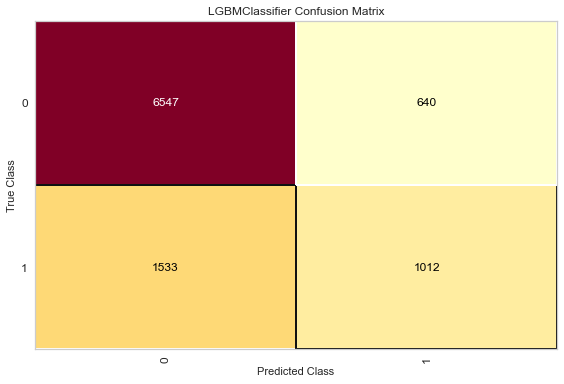

<AxesSubplot:title={'center':'LGBMClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [196]:
c = ConfusionMatrix(lgbm.LGBMClassifier())
c.fit(X_train,y_train)
c.score(X_test,y_test)
c.show()